In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import*
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

/home/nuru/.local/share/virtualenvs/deepLearn-tC2glvHT/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'data/train'
validation_path = 'data/validation'
test_path = 'data/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(64,64),classes=['cropland','building'],batch_size=50)
validation_batches = ImageDataGenerator().flow_from_directory(validation_path,target_size=(64,64),classes=['cropland','building'],batch_size=30)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(64,64),classes=['cropland','building'],batch_size=30)

Found 600 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [4]:
def plots (ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type (ims [0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) %2 == 0 else len(ims)//rows + 1
    for i in range (len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

In [6]:
#plots(imgs, titles=labels)

# BUILD AND TRAIN THE CNN

In [7]:
from keras import layers
from keras import models
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
                                                                    
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [8]:
model.compile(Adam (lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit_generator(train_batches, steps_per_epoch=12, validation_data=validation_batches, validation_steps=10, epochs=25, verbose=2)

Epoch 1/25
 - 30s - loss: 2.8458 - acc: 0.5950 - val_loss: 2.0531 - val_acc: 0.5800
Epoch 2/25
 - 26s - loss: 0.6928 - acc: 0.8150 - val_loss: 0.6175 - val_acc: 0.8367
Epoch 3/25
 - 26s - loss: 0.3189 - acc: 0.8967 - val_loss: 0.3000 - val_acc: 0.9000
Epoch 4/25
 - 43s - loss: 0.2101 - acc: 0.9283 - val_loss: 0.2220 - val_acc: 0.9233
Epoch 5/25
 - 41s - loss: 0.1530 - acc: 0.9483 - val_loss: 0.1498 - val_acc: 0.9533
Epoch 6/25
 - 27s - loss: 0.1763 - acc: 0.9450 - val_loss: 0.1426 - val_acc: 0.9500
Epoch 7/25
 - 34s - loss: 0.2023 - acc: 0.9350 - val_loss: 0.2061 - val_acc: 0.9233
Epoch 8/25
 - 32s - loss: 0.1277 - acc: 0.9617 - val_loss: 0.2133 - val_acc: 0.9167
Epoch 9/25
 - 29s - loss: 0.0873 - acc: 0.9700 - val_loss: 0.1550 - val_acc: 0.9367
Epoch 10/25
 - 34s - loss: 0.0500 - acc: 0.9850 - val_loss: 0.1281 - val_acc: 0.9533
Epoch 11/25
 - 34s - loss: 0.0341 - acc: 0.9950 - val_loss: 0.1143 - val_acc: 0.9567
Epoch 12/25
 - 34s - loss: 0.0347 - acc: 0.9917 - val_loss: 0.1365 - val_a

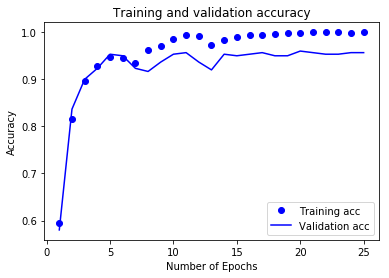

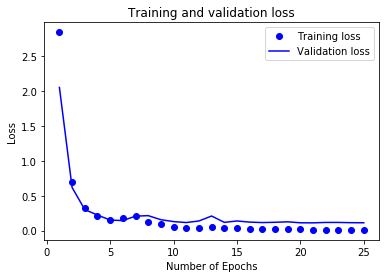

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')


plt.show()

In [11]:
#model.summary()

# making the predictions

In [12]:
test_labels = test_batches.classes

In [13]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [14]:
predictions = model.predict_generator(test_batches, steps=10, verbose=0)

In [15]:
predictions

array([[9.27002111e-05, 9.99907255e-01],
       [7.64379147e-05, 9.99923587e-01],
       [3.14132369e-04, 9.99685884e-01],
       [9.99810994e-01, 1.89075450e-04],
       [1.88009744e-06, 9.99998093e-01],
       [9.99952435e-01, 4.75378547e-05],
       [9.86140370e-01, 1.38595933e-02],
       [3.27104628e-01, 6.72895312e-01],
       [9.99971747e-01, 2.82883029e-05],
       [9.99330997e-01, 6.69019180e-04],
       [8.26355696e-01, 1.73644245e-01],
       [9.99133646e-01, 8.66411021e-04],
       [2.30565388e-03, 9.97694314e-01],
       [9.99978542e-01, 2.14708361e-05],
       [9.34744775e-01, 6.52552322e-02],
       [2.04673615e-05, 9.99979496e-01],
       [2.52383237e-04, 9.99747574e-01],
       [2.02649520e-04, 9.99797404e-01],
       [6.61400020e-01, 3.38599980e-01],
       [9.99959707e-01, 4.03399936e-05],
       [5.94100638e-05, 9.99940634e-01],
       [2.14832142e-01, 7.85167873e-01],
       [9.54299569e-01, 4.57004756e-02],
       [1.03291546e-04, 9.99896646e-01],
       [3.458436

In [16]:
#predictions.size

In [17]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    '''This fnctn prints and plots cm, normalization can be applied by setting 'normalize=True'. ''' 
    plt.imshow (cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix Without Normalization')
    print(cm)
    
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center", color="white" if cm [i,j]>thresh else "black")
    
    plt.tight_layout
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
#predictions.argmax(axis=1).size

In [19]:
#test_labels.size

In [20]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [21]:
test_batches.class_indices

{'building': 1, 'cropland': 0}

Confusion Matrix Without Normalization
[[61 89]
 [69 81]]


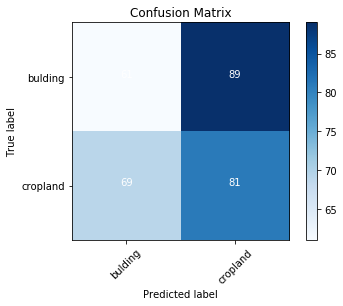

In [22]:
cm_plot_labels = ['bulding','cropland']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

In [23]:
from sklearn.metrics import classification_report

In [24]:
target_names = ['building', 'cropland']
print(classification_report(test_labels, predictions.argmax(axis=1), target_names=target_names))

             precision    recall  f1-score   support

   building       0.47      0.41      0.44       150
   cropland       0.48      0.54      0.51       150

avg / total       0.47      0.47      0.47       300

